#**Challenger TelecomX**

# **Caso de estudio**

Telecom X - Análisis de Evasión de Clientes

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.


Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

✅ Importar y manipular datos desde una API de manera eficiente.

✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.

✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.

✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.


In [ ]:
import pandas as pd
import requests
import json
from pandas import json_normalize



##Carga de datos

Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

✅ Cargar los datos directamente desde la API utilizando Python.

✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.


1- Cargando los datos

In [ ]:
url= 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

In [ ]:
df = pd.read_json(url)


##Normalizamos las columnas que contiene diccionarios

Normalizando los datos

In [ ]:
customer= json_normalize(df['customer'])
phone= json_normalize(df['phone'])
internet= json_normalize(df['internet'])
account= json_normalize(df['account'])

In [ ]:
df_normalizado= pd.concat([df[['customerID','Churn']],customer,phone,internet,account],axis=1)

Trasformamos todos los datos normalizados en un Dataframe

In [ ]:
df= pd.DataFrame(df_normalizado)

In [ ]:
# comprobamos el nuevo Df y que no tenga registros con diccionarios
df.sample(3)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
907,1271-UODNO,No,Male,0,No,No,39,Yes,Yes,DSL,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),53.85,2200.7
899,1265-XTECC,Yes,Female,1,Yes,No,68,Yes,Yes,Fiber optic,...,Yes,No,No,No,Yes,One year,Yes,Credit card (automatic),96.55,6581.9
129,0219-QAERP,No,Male,0,Yes,No,30,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,576.65


In [ ]:
df.shape
#confirmamos que tiene 7267 registros y 22 columnas

(7267, 21)

#**Exploracion de datos**

¿Qué debes hacer?

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

Explorar las columnas del dataset y verificar sus tipos de datos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


**Diccionario de datos**

**customerID:** número de identificación único de cada cliente

**Churn:** si el cliente dejó o no la empresa

**gender:** género (masculino y femenino)

**SeniorCitizen:** información sobre si un cliente tiene o no una edad igual o mayor a 65 años

**Partner:** si el cliente tiene o no una pareja

**Dependents:** si el cliente tiene o no dependientes

**tenure:** meses de contrato del cliente

**PhoneService:** suscripción al servicio telefónico

**MultipleLines:** suscripción a más de una línea telefónica

**InternetService:** suscripción a un proveedor de internet

**OnlineSecurity:** suscripción adicional de seguridad en línea

**OnlineBackup:** suscripción adicional de respaldo en línea

**DeviceProtection:** suscripción adicional de protección del dispositivo

**TechSupport:** suscripción adicional de soporte técnico, menor tiempo de espera

**StreamingTV:** suscripción de televisión por cable

**StreamingMovies:** suscripción de streaming de películas

**Contract:** tipo de contrato

**PaperlessBilling:** si el cliente prefiere recibir la factura en línea

**PaymentMethod:** forma de pago

**Charges.Monthly:** total de todos los servicios del cliente por mes

**Charges.Total:** total gastado por el cliente

##**Columnas a evaluar para el analisis solicitado**


Basado en el diccionario de datos proporcionado y la exploración inicial del DataFrame, las variables que potencialmente influyen en la decisión del cliente de dejar la empresa (Churn) son:

**Características del cliente:**

gender: Podría haber diferencias en la tasa de churn entre hombres y mujeres

SeniorCitizen: Los clientes mayores de 65 años podrían tener diferentes necesidades o lealtad a la empresa.

Partner: Los clientes con pareja podrían tener un comportamiento de churn diferente a los solteros.

**Información del contrato y servicios:**

tenure: El tiempo que un cliente ha estado con la empresa es un indicador clave; los clientes con menos antigüedad pueden ser más propensos a abandonar.

PhoneService: Si tener o no servicio telefónico influye en la decisión de irse.

MultipleLines: La cantidad de líneas telefónicas podría ser relevante.

InternetService: El tipo de servicio de internet (fibra óptica, DSL, etc.) y la calidad percibida pueden ser factores importantes.

OnlineSecurity: La percepción de seguridad en línea puede ser crucial.

OnlineBackup: La disponibilidad de respaldo en línea podría ser valorada.

DeviceProtection: La protección del dispositivo podría ser un factor de retención.

TechSupport: El acceso a soporte técnico de calidad es un factor importante en la satisfacción del cliente.

StreamingTV: La suscripción a servicios de streaming de televisión podría estar relacionada con la lealtad.

StreamingMovies: La suscripción a servicios de streaming de películas también podría ser un factor.

Contract: El tipo de contrato (mensual, anual, bianual) es un predictor muy fuerte de churn, ya que los contratos a largo plazo implican mayor compromiso.

PaperlessBilling: La preferencia por facturación en línea o en papel podría tener alguna correlación.

PaymentMethod: La forma en que el cliente paga podría estar relacionada con la comodidad y la probabilidad de churn.

**Información de cargos:**

Charges.Monthly: El monto total de los cargos mensuales es un indicador directo del costo del servicio para el cliente.

Charges.Total: El gasto total a lo largo del tiempo también es relevante, especialmente en relación con la antigüedad del cliente.




Comprobación de incoherencias en los datos

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

In [ ]:
#valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [ ]:
# valores duplicados
print("Cantidad de valores repetidos:", df.duplicated().sum())


Cantidad de valores repetidos: 0


##Limpieza de datos

Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

In [ ]:
#observamos que la columna 'Charges.Total' posee 11 registros vacios
(df['Charges.Total'].str.strip() == '').sum()


np.int64(11)

In [ ]:
#tenemos 7267 filas y algunas contienen espacios en blanco
df.shape

(7267, 21)

In [ ]:
#eliminamos todos los registros que tienen espacios en blanco ya que es solo el 3% del df total
df = df[~(df == ' ').any(axis=1)]


In [ ]:
(df['Charges.Total'].str.strip() == '').sum()

np.int64(0)

In [ ]:
#confirmamos la elim de los registrso en blanco

In [ ]:
df['Charges.Total']= df['Charges.Total'].astype(float) #cambiamos la columna Charges Total a float64

<ipython-input-66-ca59518b356e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Charges.Total']= df['Charges.Total'].astype(float) #cambiamos la columna Charges Total a float64


In [ ]:
print(df['Charges.Total'].info()) #confirmamos que cambio de object a float64

<class 'pandas.core.series.Series'>
Index: 7256 entries, 0 to 7266
Series name: Charges.Total
Non-Null Count  Dtype  
--------------  -----  
7256 non-null   float64
dtypes: float64(1)
memory usage: 113.4 KB
None


In [ ]:
(df['Churn']== '').sum()   #Churm posee 224 registros vacios

np.int64(224)

In [ ]:
# tomamos la decicion de eliminar los registros vacios ya que solo represneta en 3% de los datos recibidos
df = df[~(df.applymap(lambda x: isinstance(x, str) and x.strip() == '')).any(axis=1)]

<ipython-input-69-fde87ceab094>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df[~(df.applymap(lambda x: isinstance(x, str) and x.strip() == '')).any(axis=1)]


In [ ]:
#confirmamos que los 224 registrso sin datos fueron eliminados
(df['Churn']== '').sum()

np.int64(0)

##Creacion de una nueva columna Cuentas_diarias

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias".

Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [ ]:
#Creando la columna que nos brinda la informacion del valor por dia del servicio y lo redondeamos para que solo tenga 2 decimales
df['Cuentas_Diarias']= (df['Charges.Monthly']/30).round(2)

<ipython-input-71-330c2b468833>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cuentas_Diarias']= (df['Charges.Monthly']/30).round(2)


In [ ]:
#comfirmamos que se creo la nueva columna Cuentas_Diarias, mostramos datos brindados y que el tipo de datos concuede con el tipo de columna
df['Cuentas_Diarias'].sample(3)

,Cuentas_Diarias
4567,3.03
7196,2.68
3583,0.66


##Estandarizacion
convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [ ]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

reemplazamos en la columna SeniorCitizen y Partner, el no por 0 y el si por 1

In [ ]:
#df['Churn']= df['Churn'].replace({'Yes':1,'No':0 })

In [ ]:
df['SeniorCitizen'] =df['SeniorCitizen'].astype('object')

<ipython-input-75-72bf361ff7fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SeniorCitizen'] =df['SeniorCitizen'].astype('object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   object 
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

In [ ]:
df.sample(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
1245,1777-JYQPJ,No,Male,0,No,No,2,No,No phone service,DSL,...,No,No,No,No,Month-to-month,No,Mailed check,24.30,38.45,0.81
3505,4829-ZLJTK,No,Female,1,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,112.40,8046.85,3.75
6087,8317-BVKSO,No,Male,0,No,No,14,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.05,299.30,0.67


asignar nombres mas comprensibles a las columnas

In [ ]:
df.rename(columns={'Charges.Monthly':'Cuentas_Mensuales','Charges.Total':'Cuentas_Totales', 'Churn':'evasion_clientes','gender':'Genero','PaymentMethod': 'Metodo de pago', 'TechSupport':'Soporte tecnico', 'tenure':'Tiempo en la empresa'},inplace=True)

<ipython-input-78-99577e8c3f0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Charges.Monthly':'Cuentas_Mensuales','Charges.Total':'Cuentas_Totales', 'Churn':'evasion_clientes','gender':'Genero','PaymentMethod': 'Metodo de pago', 'TechSupport':'Soporte tecnico', 'tenure':'Tiempo en la empresa'},inplace=True)


In [ ]:
df.columns

Index(['customerID', 'evasion_clientes', 'Genero', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tiempo en la empresa', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'Soporte tecnico', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'Metodo de pago', 'Cuentas_Mensuales',
       'Cuentas_Totales', 'Cuentas_Diarias'],
      dtype='object')

##Explorar variables total gastado o tiempo de contrato

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

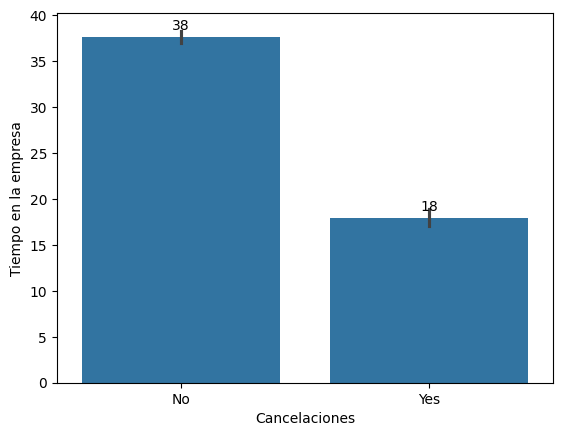

In [ ]:
# prompt: En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

import matplotlib.pyplot as plt
import seaborn as sns

tiempoempresa_cancelaciones=sns.barplot(data=df, y='Tiempo en la empresa', x='evasion_clientes')
tiempoempresa_cancelaciones.set_xlabel('Cancelaciones')
tiempoempresa_cancelaciones.set_ylabel('Tiempo en la empresa')

for container in tiempoempresa_cancelaciones.containers:
    labels = [f'{int(round(bar.get_height()))}' for bar in container]
    tiempoempresa_cancelaciones.bar_label(container, labels=labels, padding=3)

plt.show()


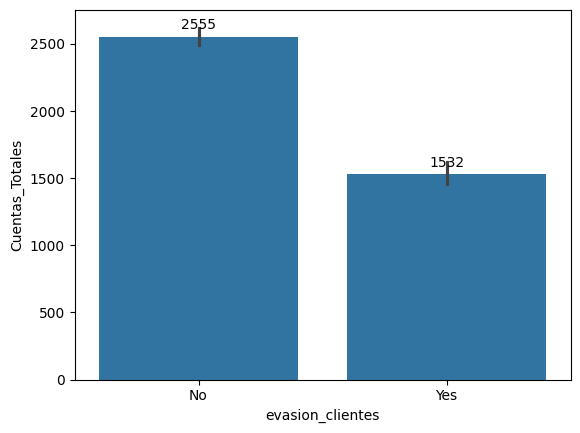

In [ ]:
cuentastotales_cancelaciones= sns.barplot(data=df, x='evasion_clientes', y ='Cuentas_Totales')
#cuentastotales_cancelaciones.set_xlabel('Cancelaciones')
#cuentastotales_cancelaciones.set_ylabel('Cuentas totales')
for container in cuentastotales_cancelaciones.containers:
    labels = [f'{int(round(bar.get_height()))}' for bar in container]
    cuentastotales_cancelaciones.bar_label(container, labels=labels, padding=3)
plt.show()

#**Analisis descriptivo**

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [ ]:
df.describe().round(3)


,Tiempo en la empresa,Cuentas_Mensuales,Cuentas_Totales,Cuentas_Diarias
count,7032.000,7032.000,7032.000,7032.000
mean,32.422,64.798,2283.300,2.160
std,24.545,30.086,2266.771,1.003
min,1.000,18.250,18.800,0.610
25%,9.000,35.588,401.450,1.188
50%,29.000,70.350,1397.475,2.340
75%,55.000,89.862,3794.738,2.992
max,72.000,118.750,8684.800,3.960


In [ ]:
df.columns

Index(['customerID', 'evasion_clientes', 'Genero', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tiempo en la empresa', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'Soporte tecnico', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'Metodo de pago', 'Cuentas_Mensuales',
       'Cuentas_Totales', 'Cuentas_Diarias'],
      dtype='object')

##Recuento de evasión por variables categóricas

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [ ]:
df.columns

Index(['customerID', 'evasion_clientes', 'Genero', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tiempo en la empresa', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'Soporte tecnico', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'Metodo de pago', 'Cuentas_Mensuales',
       'Cuentas_Totales', 'Cuentas_Diarias'],
      dtype='object')

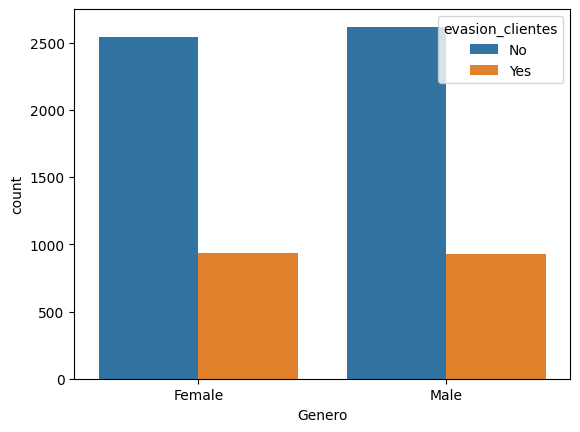

In [ ]:
sns.countplot(data=df, x='Genero', hue='evasion_clientes')
plt.show()

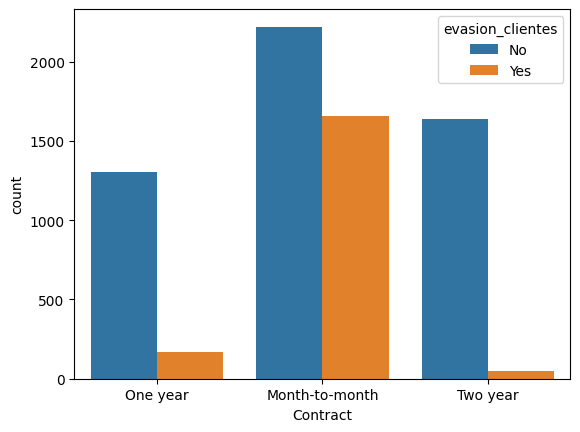

In [ ]:
sns.countplot(data=df, x='Contract', hue='evasion_clientes')
plt.show()

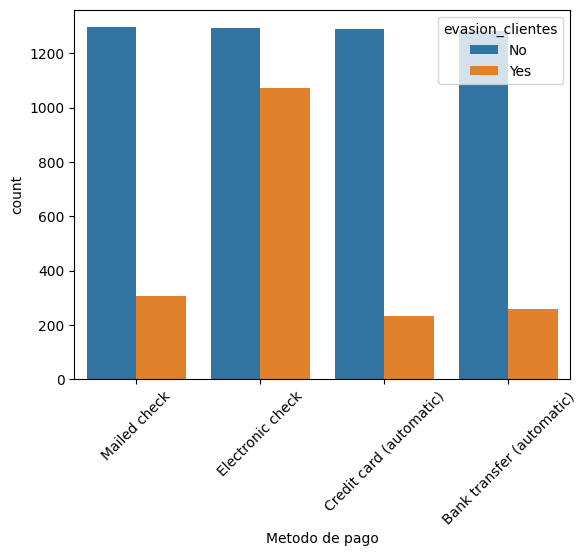

In [ ]:
sns.countplot(data=df, x='Metodo de pago', hue='evasion_clientes')
plt.xticks(rotation=45)
plt.show()

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

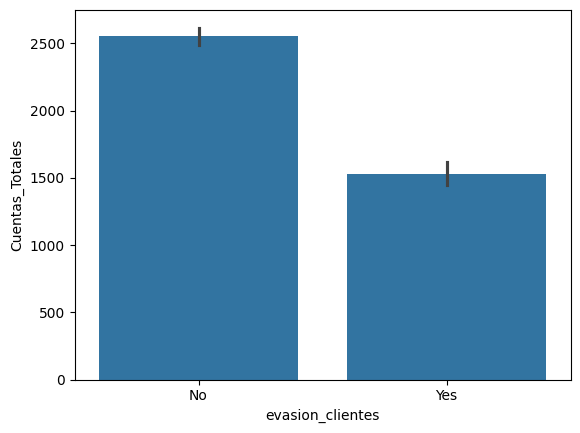

In [ ]:
sns.barplot(data=df, x='evasion_clientes', y='Cuentas_Totales')
plt.show()

#Informe

inaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:










Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀


Nos concentramos en la empresa Telecom X con el fin de hacer un analisis de perdida de clientes (Churn)

queremos con esto destacar la importancia de los puntos claves sobre lo que vamos a evaluar



*   Medir la fidelizacion de los clientes
*   Observar si el churn esta relacionado con el producto, la satisfaccion o la atencion
*   Como impacta en los ingresos
*   Que variables estan realcionadas con el abandono







**🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).**

La empresa Telecom X nos brindo un archivo desde un link de guithub.

Como primer paso importamos los archivos de la url para de esa manera mejorar la manipulacion, posteriormante cargamos en una variable el Dataframe. Cuando exploramos nuestra variable verificamos que posee algunas columnas que estan compuesta por diccionarios por ese motivo normalizamos dichas columnas para manejar un dataframe mas claro y manipulable.


**🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.**

Comenzamos el tratamiento definiendo el diccionario de los datos para poder comprender cada variable que tenemos y cual es su funcion dentro del dataframe. Renombramos algunas columnas para poder tener mas claro que representa dicha variable y creamos una nueva columna llamada cuentas diarias para poder saber el monto que el cliente paga por dia del servicio. Por otra parte verificamos las columas que poseen dartos nulos y elegimos la mejor estrategia posible para manupular los datos faltantes (en este caso borrarlas ya que solo representaba el 3% del total de los registros). Estandarizamos algunas columnas que contienen variables si/no por 1/0 para hacer las facil su trabajo con respecto a la relacion con otras variables. Corregimos el tipo de algunas columnas que estaban como object a int o float segun corresponda el dato que contengan

**🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.**

Una vez realizada la manipulacion de los datos procedemos a realizar un analisis exploratorio de los mismos y la relacion que poseen con el analisis de perdida de clientes mediante el metodo describe podemos tener un analisis general de las variables a trabajar y donde podemos observar la media, la mediana, la moda y los cuartiles a trabajar. Como principal medida nos concentramos en la relacion de la variable Total gastado (representa la cuenta y los gastos que tiene el cliente en la empresa) y el Churn obteniendo asi el grafico correspondiente. Paso siguente relacionamos en la grafica de barras la columna tiempo en la empresa con el churn

**🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.**

Del analisis y de las graficas observables de las variables categoricas y no categoricas podemos obtener los siguientes hallazgos

*   Cuanto mas tiempo tiene en la empresa tiene un 50% mas de probabiliada de mmantener el servicio
*   No hay ningun indicio que dependiendo del sexo este relacionado con el abandono de la empresa

*   Se nota una relacion entre el tipo de contrato que posee el cliente con la perdida del mismo ya que cuando el cliente tiene un contrato a corto plazo es mas propenso a irse de la empresa

*   En el metodo de pago tambien podemos observar una relacion con respecto a la evasion del servicio
*   Elemento de lista









**🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.**

Teniendo como premisa que siempre es mas facil mantener un cliente que adquirir nuevos nos vamos a centrar sobre lo observable en el analisis exploratorio y los graficos del siguiente modo notamos lo siguiente :


*   Crear acciones para que el cliente pueda tener contrato por mas de 2 años ya que la grafica nos nuestra que un cliente que tiene contratos mas largos tienen la intension de seguir en la empresa
*   Incentivar a que el pago del servicio principalmente sea mediante tarjeta de credito de manera automatica o por transferencia bancaria automatica
*   Incentivar a la fidelizacion con promociones para que los clientes tengan mas servicios en la empresa ya que cuanto mas cuenta tiene mas propenso a quedarse





